### Group 5 - Project 1

Implementing the LCA and BD Models.

Coded by Philippe Noël and Lizzy Schick

Task

1. Implement the leaky competing accumulator (LCA) and bounded diffusion (BD) models as described in Tsetsos et al. (2012). Show that the BD model predicts a primacy effect, as demonstrated by the motion pulse experiments of Kiani et al. (2008). In particular, these experiments found that adding a motion pulse to the stimulus had a stronger effect on decisions when the pulse was applied earlier. Then show that the LCA model predicts the opposite result (recency effect) when the leak parameter is strong relative to the inhibition parameter. Finally, show that the LCA model predicts a primacy effect when inhibition is strong relative to leak.
2. Compute the reward rate (total reward divided by total time) for the LCA model with different inhibition and leak parameter values. How do the optimal parameters change for early vs. late motion pulses?

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

We proceed by first implementing the LCA model and showing its behavior, and then implementing the DB model and showing its behavior.

## Task 1.1 Implement LCA model

In [0]:
# LCA Model equations

# calculates delta x_1 to add to decision variable x_1 at next timestep  
def LCA_dx1(I0, I1, x1, x2, k, beta, sigma):
    return I1 - k * x1 - beta * x2 + I0 + np.random.normal(0, sigma) # input, leak, inhibition plus normally distributed noise
  
# calculates delta x_2 to add to decision variable x_2 at next timestep  
def LCA_dx2(I0, I2, x1, x2, k, beta, sigma):
    return I2 - k * x2 - beta * x1 + I0 + np.random.normal(0, sigma) # input, leak, inhibition plus normally distributed noise

# calculates the next timestep x_1 for the LCA model
def LCA_next_x1(I0, I1, x1, x2, k, beta, sigma):
    return max(0, x1 + LCA_dx1(I0, I1, x1, x2, k, beta, sigma)) # bound x1 >= 0

# calculates the next timestep x_2 for the LCA model  
def LCA_next_x2(I0, I2, x1, x2, k, beta, sigma):
    return max(0, x2 + LCA_dx2(I0, I2, x1, x2, k, beta, sigma)) # bound x2 >= 0

These equations implement the LCA model. We can now create a general function and parameters to iterate the LCA model.

In [0]:
# General LCA function applying the model to parameters
def LCA_function(beta, k, c, s, pulse=None):
  x1_values, x2_values = [], [] # store values at each timestep for plotting
  initial_x = 0 # starting point for our decision variables
  timesteps = np.arange(0, 201, 1) # 200 timesteps
  
  # parameters
  sigma = 0.1 # noise strength, as defined in the paper
  I0 = 0.2 # some input, as defined in the paper
  I2 = 0 # no input, as defined in the paper

  # set starting conditions
  x1_values.append(initial_x)
  x2_values.append(initial_x)
  last_x1 = initial_x
  last_x2 = initial_x
  
  # iterate LCA model over all timesteps
  for t in timesteps[:-1]:
    if (pulse == 'early') and (t == int(0.25 * len(timesteps[:-1]))): 
      c = c + 0.032  # using 3.2% coherence change from Kiani et al
    if (pulse == 'late') and (t == int(0.75 * len(timesteps[:-1]))):
      c = c + 0.032  # using 3.2% coherence change from Kiani et al
    I1 = c * s
    # update decision variables for this new timestep
    curr_x1 = LCA_next_x1(I0, I1, last_x1, last_x2, k, beta, sigma)
    curr_x2 = LCA_next_x2(I0, I2, last_x1, last_x2, k, beta, sigma)
    
    # add new values to our values array for plotting
    x1_values.append(curr_x1)
    x2_values.append(curr_x2)
    
    # update for next timestep
    last_x1 = curr_x1
    last_x2 = curr_x2

   
  # plot decision variable values
  plt.plot(timesteps,x1_values,'r') 
  plt.plot(timesteps,x2_values,'b')
  
  return x1_values, x2_values

We have now a complete LCA model with the fixed parameters from the paper incorporated in. The free parameters are the following:
- k (leak)
- beta (inhibition)
- c (coherence)
- s (sensitivity)

We will now evaluate various values for these parameters based on the the Tsetsos paper to demonstrate recency and primacy, and evaluate how the model reacts for various coherence and sensitivity levels.

In the paper, Tsestos et al. experiment with four different coherence levels. We define them here and test both recency and primacy under all coherence levels. We set sensitivity to a fix value for now, and will explore its effects later. We first explore the effects of changing the coherence level.

In [0]:
# In this trial, we set a fixed sensitivity and explore how coherence affects
# the model without recency/primacy
# parameters
cs = [0.064, 0.128, 0.256, 0.512]
s = 0.5 # fixed value for now

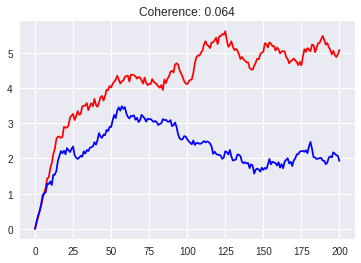

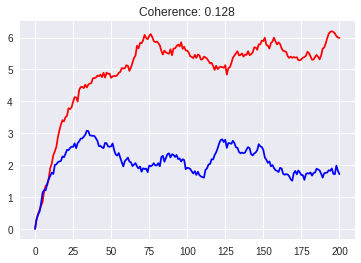

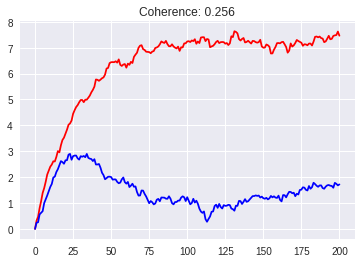

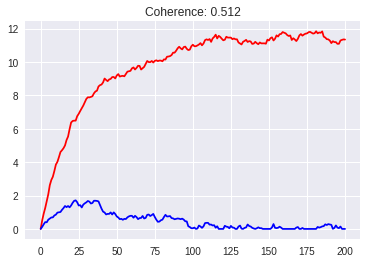

In [0]:
# arbitrary beta and k for example here
beta = 0.02 # inhibition
k = 0.04 # leak

# test LCA for every coherence
for i, c in enumerate(cs):
  plt.figure(i)
  plt.title("Coherence: " + str(c))
  x = LCA_function(beta, k, c, s)

As we can see here, the higher the coherence, the faster the two decision variables diverge. This makes intuitive sense, since the higher the coherence, the easier it is for the subject to make a decision. This is because as coherence increase, the decision is more clear and there is less noise. 

Sensitivity is essentially a way of scaling this difference. Since it is multiplying c, and c can only go between 0 and 1, sensitivity is a way of scaling this measure of coherence. It would have the same graphical behavior as coherence. The higher the sensitivity, the better the subject is at distinguishing the decision to be made in the stimulus. Therefore, we omit graphing it.

## Task 1.2 Showing recency effect for leak >> inhibition

We now run the model for the case where the leak parameter is greater than the inhibition parameter. This should show recency (late information more important). We use the same parameters as in the table on page 12 of Tsestos.

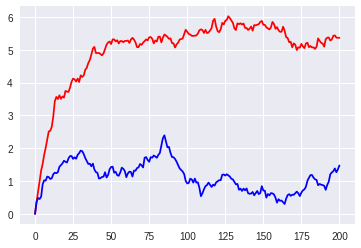

In [0]:
# LCA leak dominance (k > beta) - recency effect
beta = 0.025 # inhibition
k = 0.05 # leak

# these two lead to I_1 = 0.1, as per the paper

s = 1 # sensitivity
c = 0.1 # coherence

# test LCA
x = LCA_function(beta, k, c, s)

This shows recency. As we can see, the difference between the two decision variables get larger later on, implying that later evidence is more useful for making a decision, which is recency. We can visualize this better by lowering sensitivity.

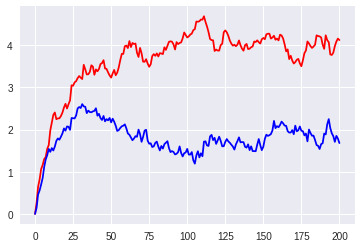

In [0]:
# LCA leak dominance (k > beta) - recency effect with lower sensitivity
beta = 0.025 # inhibition
k = 0.05 # leak

# lower sensitivity for better visualization
s = 0.5 # sensitivity
c = 0.1 # coherence

# test LCA
x = LCA_function(beta, k, c, s)

As we can see, recency is even more clear here. The two decision variables are almost the same for the first half of the trial, implying that no clear progress has gone towards the decision. Then, later evidence is weighted more heavily and this shows recency.

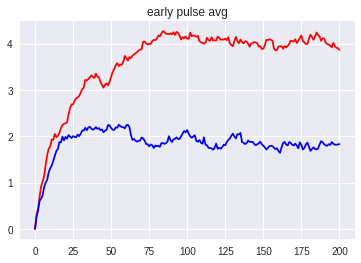

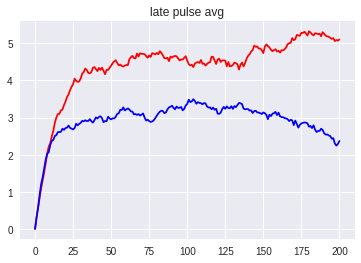

In [0]:
# LCA leak dominance (k > beta) - recency effect
beta = 0.025 # inhibition
k = 0.05 # leak

# these two lead to I_1 = 0.1, as per the paper

s = 0.5 # sensitivity
c = 0.064 # coherence
pulses = ['early','late']
dv_1 = np.zeros(201)
dv_2 = np.zeros(201)
n = 3

# average LCA for different pulses
for i, p in enumerate(pulses):
  plt.figure(i)
  for i in range(n):
    x = LCA_function(beta, k, c, s, p)
    dv_1 = x[0] + dv_1
    dv_2 = x[1] + dv_2
  
  dv_1 = np.divide(dv_1,n)
  dv_2 = np.divide(dv_2,n)
  plt.clf();
  plt.title(str(p)+" pulse avg")
  plt.plot(dv_1,'r')
  plt.plot(dv_2,'b')

When we add in motion pulses, we can more clearly see the recency effect when leak is stronger than inhibition. At this low coherence level of 6.4%, we can test to more clearly see the effect of the pulses since the decision is not so clear as if the coherence was higher. We can see here the early pulse confuses the decision variables, while in the case of the late pulse the decision variables show much greater separation.

## Task 1.3 Showing primacy effect for inhibition >> leak

We now run the model for the case where the inhibition parameter is greater than the leak parameter. This should show primacy.

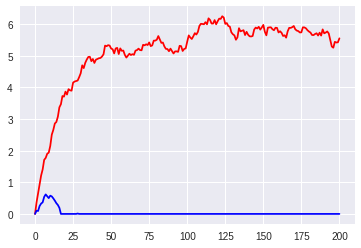

In [0]:
# LCA inhibition dominance (k < beta) - primacy effect
beta = 0.095 # inhibition
k = 0.05 # leak

# I_1 = 0.1, as per the paper
s = 1 # sensitivity
c = 0.1 # coherence

# test LCA for
x = LCA_function(beta, k, c, s)

This clearly shows primacy, since the two decision variables diverge very fast, showing how early information is weighted heavily. Rapidly the blue decision variable is bound to 0, meaning that later information does not contribute significantly to the decision (since the decision variable is calculated as a difference of x1 and x2). This therefore shows primacy. We can better visualize it with a lower sensitivity, as we did previously.

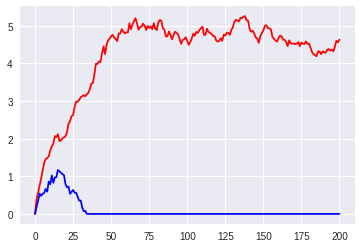

In [0]:
# LCA inhibition dominance (k < beta) - primacy effect
beta = 0.095 # inhibition
k = 0.05 # leak

# lower sensitivity for better visualization
s = 0.5 # sensitivity
c = 0.1 # coherence

# test LCA for
x = LCA_function(beta, k, c, s)

The difference in visualization is not as important here, but we can see how primacy takes place and how the two decision variables diverge rapidly.

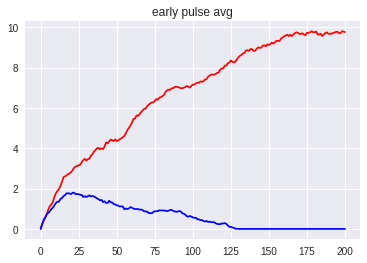

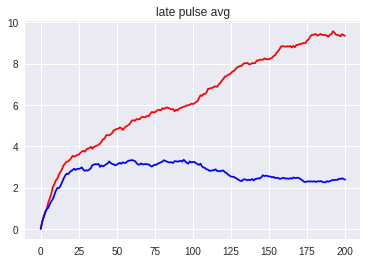

In [0]:
# LCA inhibition dominance (k < beta) - primacy effect
beta = 0.05 # inhibition
k = 0.025 # leak

# these two lead to I_1 = 0.1, as per the paper

s = 0.5 # sensitivity
c = 0.064 # coherence
pulses = ['early','late']
dv_1 = np.zeros(201)
dv_2 = np.zeros(201)
n = 3

# average LCA for different pulses
for i, p in enumerate(pulses):
  plt.figure(i)
  for i in range(n):
    x = LCA_function(beta, k, c, s, p)
    dv_1 = x[0] + dv_1
    dv_2 = x[1] + dv_2
  
  dv_1 = np.divide(dv_1,n)
  dv_2 = np.divide(dv_2,n)
  plt.clf();
  plt.title(str(p)+" pulse avg")
  plt.plot(dv_1,'r')
  plt.plot(dv_2,'b')

Under the inhibition dominance condition, when we introduce pulses to the LCA model, we see the primacy effect very clearly. The early pulse helps separate the decision variables quickly. The late pulse on the other hand, which is deemphasized due to primacy, has a latent effect on decision variables.

## Task 1.4 Implement BD model

We implement the BD model as per the paper.

In [0]:
np.random.seed(1)
# BD equations
def BD_dx1(I1,sigma):
    return I1+np.random.normal(0,sigma) # input plus normally distributed noise
def BD_dx2(I2,sigma):
    return I2+np.random.normal(0,sigma) # input plus normally distributed noise

def BD_y1(x1,x2):
    return x1-x2 # decision variable
def BD_y2(x1,x2):
    return x2-x1 # decision variable

In [0]:
# General BD function
# Can modify coherence for pulse experiment by setting pulse to 
def BD_function(A,c,s,sigma,pulse = None):
  
  y1_values, y2_values = [], [] # store decision variables y1,y2
  timesteps = np.arange(0, 201, 1) # 200 timesteps at 3.5 msec intervals
  
  y1_values.append(0)
  y2_values.append(0)
  last_y1 = 0
  last_y2 = 0
  x1 = 0
  y1 = 0
 
  
  cross = False # boolean for crossing threshold A
  
  for t in timesteps[:-1]:
    I1 = c*s
    I2 = 0
    if (pulse == 'early') and (t == int(0.25 * len(timesteps[:-1]))): 
      c = c + 0.032  # using 3.2% coherence change from Kiani et al
    if (pulse == 'late') and (t == int(0.75 * len(timesteps[:-1]))):
      c = c + 0.032  # using 3.2% coherence change from Kiani et al
      
    if(abs(last_y1) >= abs(A)): # check threshold
      cross = True
      break
    if(abs(last_y2) >= abs(A)): # check threshold
      cross = True
      break
    
    # update decision variables
    curr_y1 = last_y1 + BD_dx1(I1,sigma) - BD_dx2(I2,sigma)
    curr_y2 = last_y2 + BD_dx2(I2,sigma) - BD_dx1(I1,sigma)
    # add dv values to array
    y1_values.append(curr_y1)
    y2_values.append(curr_y2)
    # update for next timestep
    last_y1 = curr_y1
    last_y2 = curr_y2
  
  if cross == True:
    timesteps = timesteps[0:len(y1_values)]
  
  print('Number of timesteps to decision:',len(y1_values))
    
  plt.plot(timesteps,y1_values,'r') # plot decision variable values
  plt.plot(timesteps,y2_values,'b')

We first test the BD model linearly to see how it reaches threshold.

Number of timesteps to decision: 144


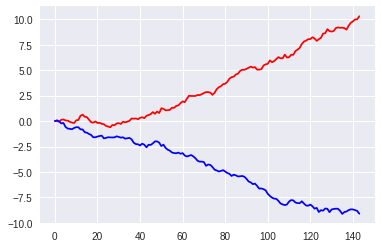

In [0]:
# Test simple BD model 
A = 10
c = .064
s = 1
sigma = 0.1

BD_function(A,c,s,sigma)
# Works as expected, linearly approaching threshold over time

We then go on to test for primacy effect by using an early pulse. For an early pulse, the model should rapidly diverge its decision variables, which would imply that early information is more valuable, and thus imply primacy.

## Task 1.5 Showing BD Primacy with early pulse

Number of timesteps to decision: 123


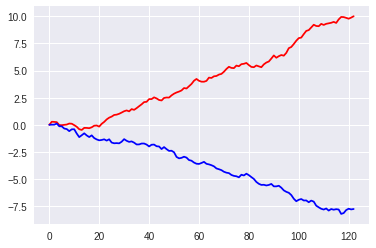

In [0]:
# Test for primacy effect by using early pulse
A = 10
c = .064
s = 1
sigma = 0.1
pulse = 'early'

BD_function(A,c,s,sigma,pulse)
# Takes very few timesteps to get to threshold for early pulse, showing primacy

This indeed shows primacy, since only 16 timesteps of 3.5 msec were required for divergence.

We then go on to show again primacy, but this time for the late pulse. In this situation, the divergence of decision variables should be slower, because there is no "rush" of information early on, and since early information is more valuable if primacy is true, then the variables should diverge more slowly since there is less information early on than under an early pulse.

## Task 1.6 Showing BD Primacy with late pulse

Number of timesteps to decision: 143


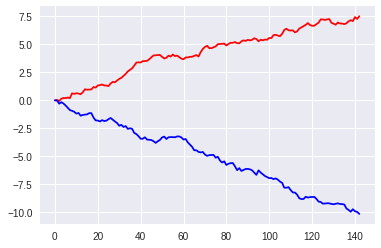

In [0]:
# Test for primacy effect by using late pulse
A = 10
c = .064
s = 1
sigma = 0.1
pulse = 'late'

BD_function(A,c,s,sigma,pulse)
# Takes many more timesteps to get to threshold for late pulse, showing primacy

This is indeed what we observe, which confirms primacy for the BD model.

## Task 2.1 Computing the reward rate for LCA under different k and beta parameters

We expect that under inhibition dominance, the primacy effect will mean that the reward rate will start increasing earlier, so the model should yield higher reward rates under the inhibition dominance condition. We will test this hypothesis by comparing outcomes for leak vs. inhibition dominance intersected with the late and early pulses.

In [0]:
# Compute reward rate
# Inputs are x1, the correct choice, and x2, the incorrect choice, from the LCA function
def Reward_Rate(x1,x2):
  # Compute cumulative reward at each timestep
  # Add 1 if correct choice decision variable is greater, 0 otherwise
  reward = 0
  timesteps = 200
  
  time = np.arange(0,len(x1)-1)
  for i,x in enumerate(x1):
    if(x1[i] > x2[i]):
      reward = reward + x1[i]/(x2[i]+1)
      
  return round(reward/timesteps,2)

We expect inhibition dominance to show primacy, which would mean reward is higher for an early pulse than a late pulse. We expect leak dominance to show recency, which would mean reward is higher for a late pulse than an early pulse.

We expect reward to be higher in primacy compared to recency conditions, as hypothesized above, which our model has consistently shown.

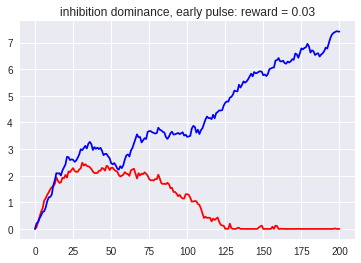

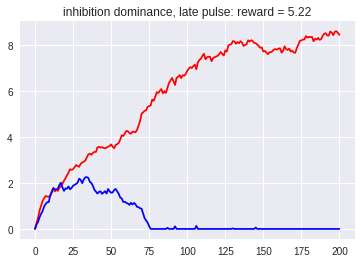

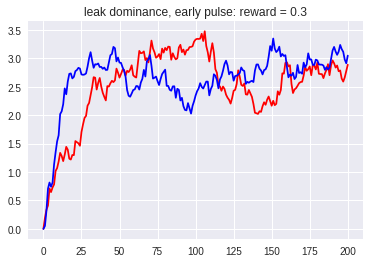

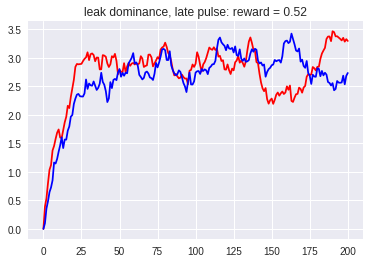

In [0]:
# Compare reward rates
A = 10
beta = [0.05,0.05,0.025,0.025] # inhibition
k = [0.025,0.025,0.05,0.05] # leak
s = 0.1 # sensitivity
c = 0.064 # coherence
pulses = ['early','late','early','late']

# test LCA
for i, p in enumerate(pulses):
  plt.figure(i)
  x = LCA_function(beta[i], k[i], c, s, p)
  r = Reward_Rate(x[0],x[1])
  if (beta[i] > k[i]):
    dom = 'inhibition'
  if (k[i] > beta[i]):
    dom = 'leak'
  plt.title(str(dom)+" dominance, "+str(p)+" pulse: "+"reward = "+str(r))

Our plots show exactly what we expected: primacy for inhibition dominance, with a higher reward for an early pulse; recency for leak dominance, with a higher reward for a late pulse. We ran these trials multiple times and consistently found the magnitude of the rewards for the primacy condition to be greater, which fits our hypothesis.

In [0]:
# Compare reward rates
A = 6
beta = [0.05,0.05,0.025,0.025] # inhibition
k = [0.025,0.025,0.05,0.05] # leak
s = 0.1 # sensitivity
c = 0.064 # coherence
pulses = ['early','late','early','late']

 # Average rewards
n = 1000

# average reward for different pulses/leak-inhibition
for i, p in enumerate(pulses):
  plt.figure(i)
  r_avg = 0
  for j in range(n):
    x = LCA_function(beta[i], k[i], c, s, p)
    r = Reward_Rate(x[0],x[1])
    r_avg = r_avg + r
  
  r_avg = r_avg / n
  if (beta[i] > k[i]):
    dom = 'inhibition dominance\t'
  if (k[i] > beta[i]):
    dom = 'leak dominance\t\t'
  print(str(dom)+str(p)+" pulse\t "+"avg reward = "+str(r))
  plt.close();

inhibition dominance	early pulse	 avg reward = 1.4
inhibition dominance	late pulse	 avg reward = 0.08
leak dominance		early pulse	 avg reward = 0.35
leak dominance		late pulse	 avg reward = 0.54


## Task 2.2 Explaining how optimal parameters k and beta change for early vs. late motion pulse